Jamboree has launched a feature on their website that allows students to check their probability of getting into an Ivy League college. The goal is to help students understand the factors that influence graduate admissions and predict their chances of admission based on these factors. This analysis will assist Jamboree in understanding which variables are most important in graduate admissions and how they interact, enabling them to offer better guidance and services to prospective students.

In [1]:
#https://drive.google.com/file/d/1FwEfjjt-564bms5rLcbM00xbnjtHi05l/view?usp=sharing

!gdown 1FwEfjjt-564bms5rLcbM00xbnjtHi05l

Downloading...
From: https://drive.google.com/uc?id=1FwEfjjt-564bms5rLcbM00xbnjtHi05l
To: /content/Jamboree_Admission.csv
100% 16.2k/16.2k [00:00<00:00, 28.4MB/s]


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
data=pd.read_csv('Jamboree_Admission.csv')

In [4]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [5]:
data= data.drop(['Serial No.'],axis=1)

In [6]:
data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   GRE Score          500 non-null    int64  
 1   TOEFL Score        500 non-null    int64  
 2   University Rating  500 non-null    int64  
 3   SOP                500 non-null    float64
 4   LOR                500 non-null    float64
 5   CGPA               500 non-null    float64
 6   Research           500 non-null    int64  
 7   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


In [8]:
data.shape

(500, 8)

In [9]:
data.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

The dataset contains 500 observations (rows) and 8 attributes (columns), excluding the unique identifier (Serial No.) that was dropped for the analysis.

In [10]:
duplicate_rows = data.duplicated().sum()
duplicate_rows

0

In [11]:
data.isna().sum()

,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,0
CGPA,0
Research,0
Chance of Admit,0


In [12]:
# Identifying outliers using the IQR method

# Function to calculate IQR and detect outliers
def iqr_outliers(data):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((data < lower_bound) | (data > upper_bound)).sum()
    return outliers

# Applying the IQR method to each numerical column
iqr_outliers_result = data.select_dtypes(include=[np.number]).apply(iqr_outliers)

iqr_outliers_result


,0
GRE Score,0
TOEFL Score,0
University Rating,0
SOP,0
LOR,1
CGPA,0
Research,0
Chance of Admit,2


In [13]:
data.shape

(500, 8)

In [15]:
#Removing outlier data
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data_cleaned = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

In [17]:
data_cleaned.shape

(497, 8)

In [18]:
data_cleaned.describe()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000
mean,316.583501,107.259557,3.122736,3.379276,3.492958,8.582334,0.563380,0.723883
std,11.237070,6.036101,1.140806,0.987070,0.918806,0.601367,0.496466,0.138800
min,290.000000,92.000000,1.000000,1.000000,1.500000,6.800000,0.000000,0.360000
25%,308.000000,103.000000,2.000000,2.500000,3.000000,8.130000,0.000000,0.640000
50%,317.000000,107.000000,3.000000,3.500000,3.500000,8.560000,1.000000,0.720000
75%,325.000000,112.000000,4.000000,4.000000,4.000000,9.040000,1.000000,0.820000
max,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


#Data Types:
The data types are mostly integers (int64) and floats (float64), which is appropriate for this kind of dataset.

#Missing Values:
There are no missing values in the dataset, as all columns have 500 non-null entries.

#Statistical Summary:

1. The GRE scores range from 290 to 340, with a mean of 316.58.
1. TOEFL scores range from 92 to 120, with a mean of 107.25.
2. University ratings range from 1 to 5, with an average around 3.12.
3. The SOP and LOR scores range from 1 to 5.
4. CGPA ranges from 6.8 to 9.92, with an average of 8.58.
5. Research experience is binary (0 or 1), with about 56% of students having research experience.
6. The Chance of Admit ranges from 0.36 to 0.97, with an average of 0.72.

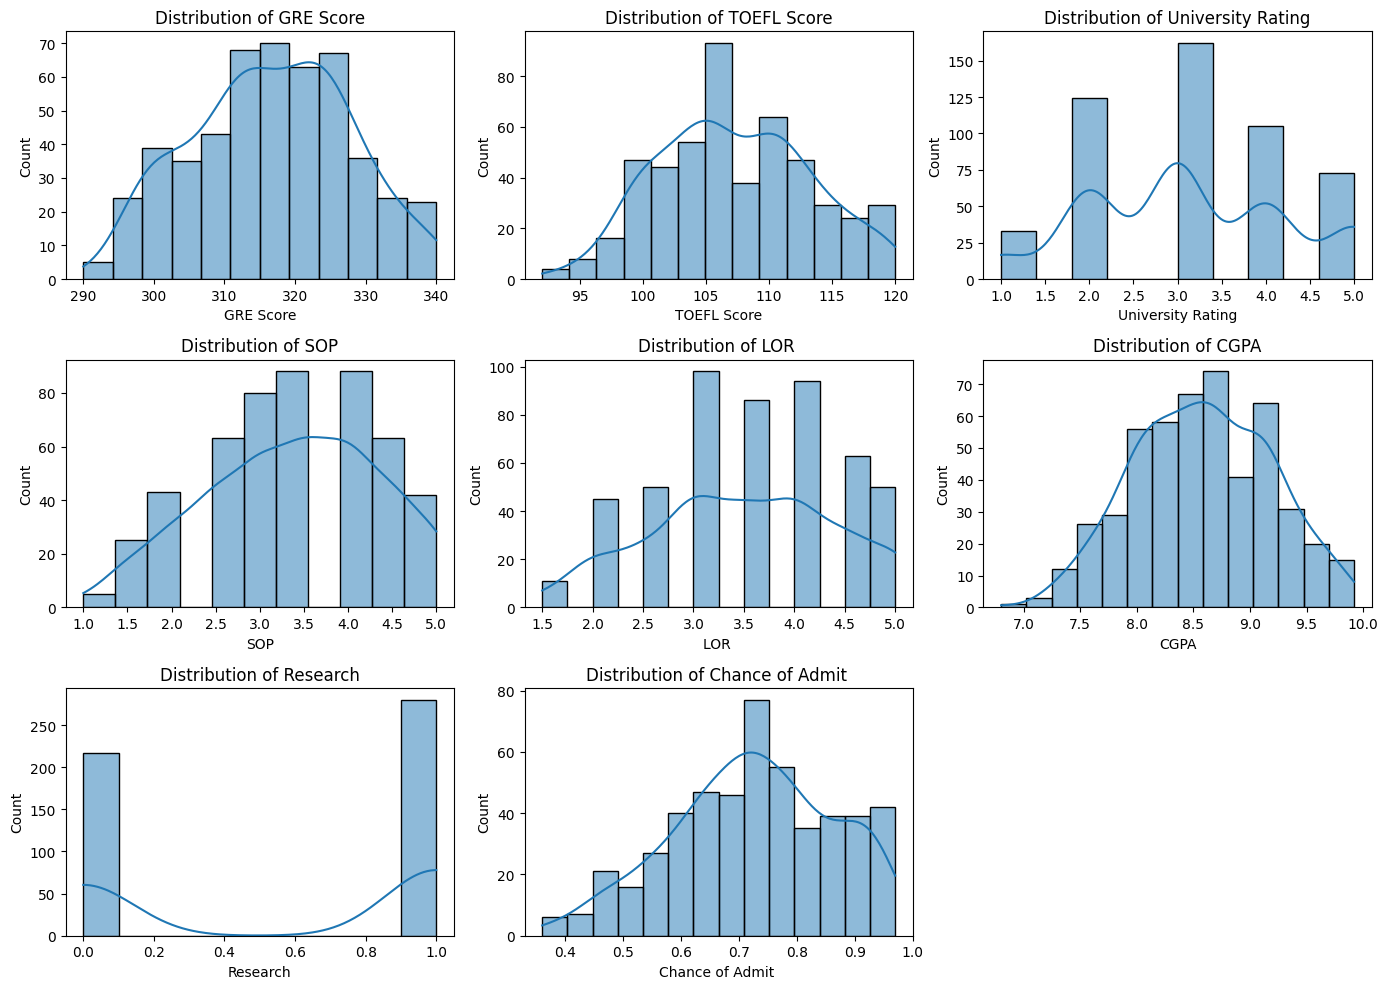

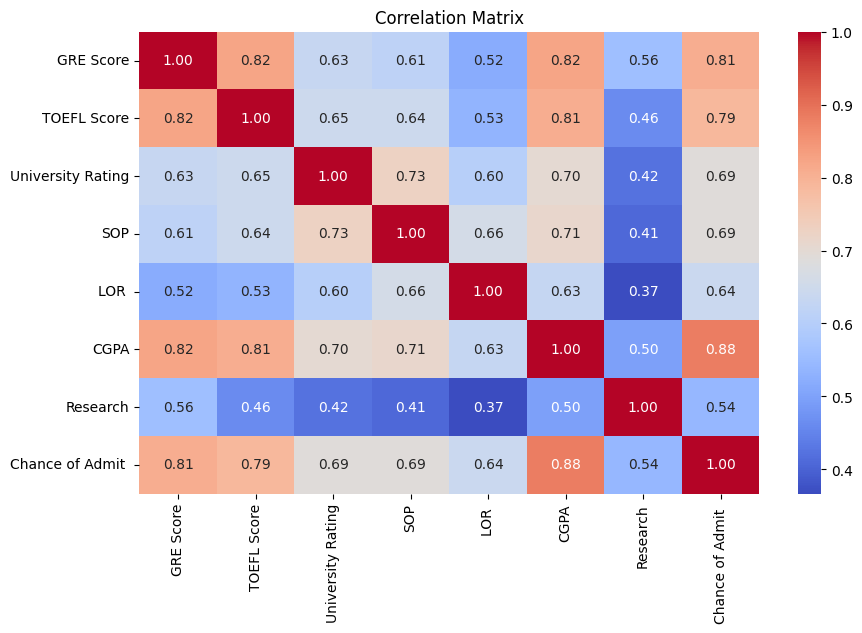

In [19]:
# Visualizing the distributions of the continuous variables
plt.figure(figsize=(14, 10))
for i, col in enumerate(data_cleaned.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data_cleaned[col], kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()

# Correlation heatmap to visualize relationships between variables
plt.figure(figsize=(10, 6))
corr_matrix = data_cleaned.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


#Observations from the Data Visualization:

##Distributions:

* GRE Scores and TOEFL Scores: Both are slightly skewed to the left, with most students scoring on the higher end of the spectrum.
* University Rating: Most ratings are clustered around 3 and 4.
* SOP and LOR Strength: The distributions are fairly uniform, with slight peaks around scores of 3 to 4.
* CGPA: Most students have a CGPA between 8 and 9, with fewer students having extreme CGPA values.
* Research: A binary variable, with slightly more students having research experience.
* Chance of Admit: This variable is skewed towards higher chances of admission, indicating that most students have a decent chance of being admitted.

#Correlation Matrix:

* CGPA has the strongest positive correlation with the Chance of Admit (0.88), suggesting that higher CGPA significantly increases the probability of admission.
* GRE Scores and TOEFL Scores also positively correlate with the Chance of Admit, though less strongly than CGPA.
* Research experience shows a moderate positive correlation with the Chance of Admit.
* University Rating, SOP, and LOR have weaker correlations with the Chance of Admit, suggesting they are less influential compared to GRE, TOEFL, and CGPA.

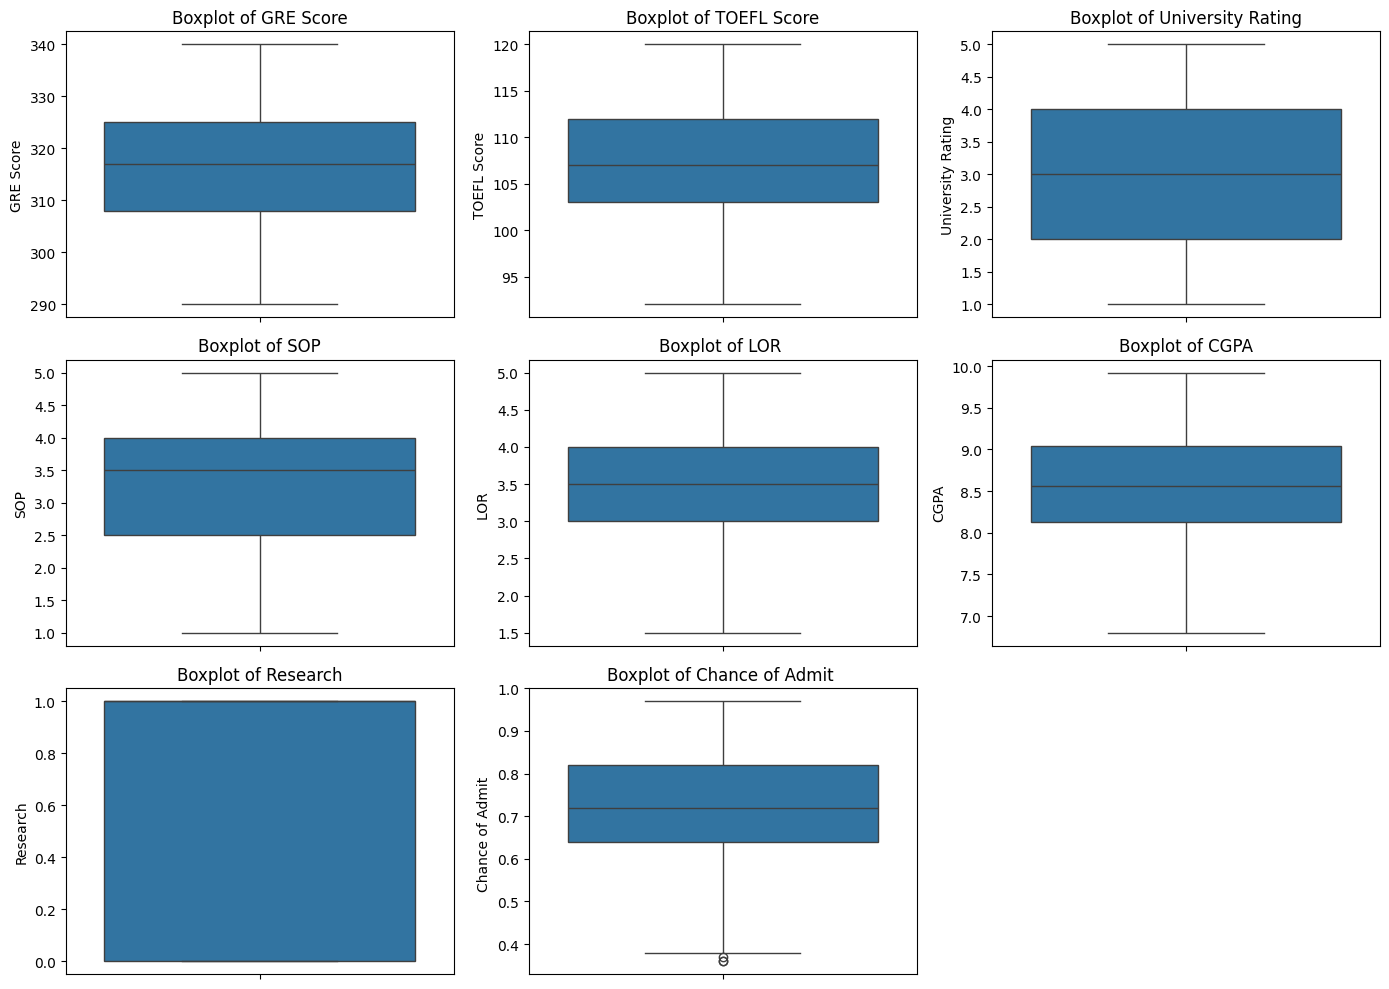

In [20]:
plt.figure(figsize=(14, 10))
for i, col in enumerate(data_cleaned.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data_cleaned[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


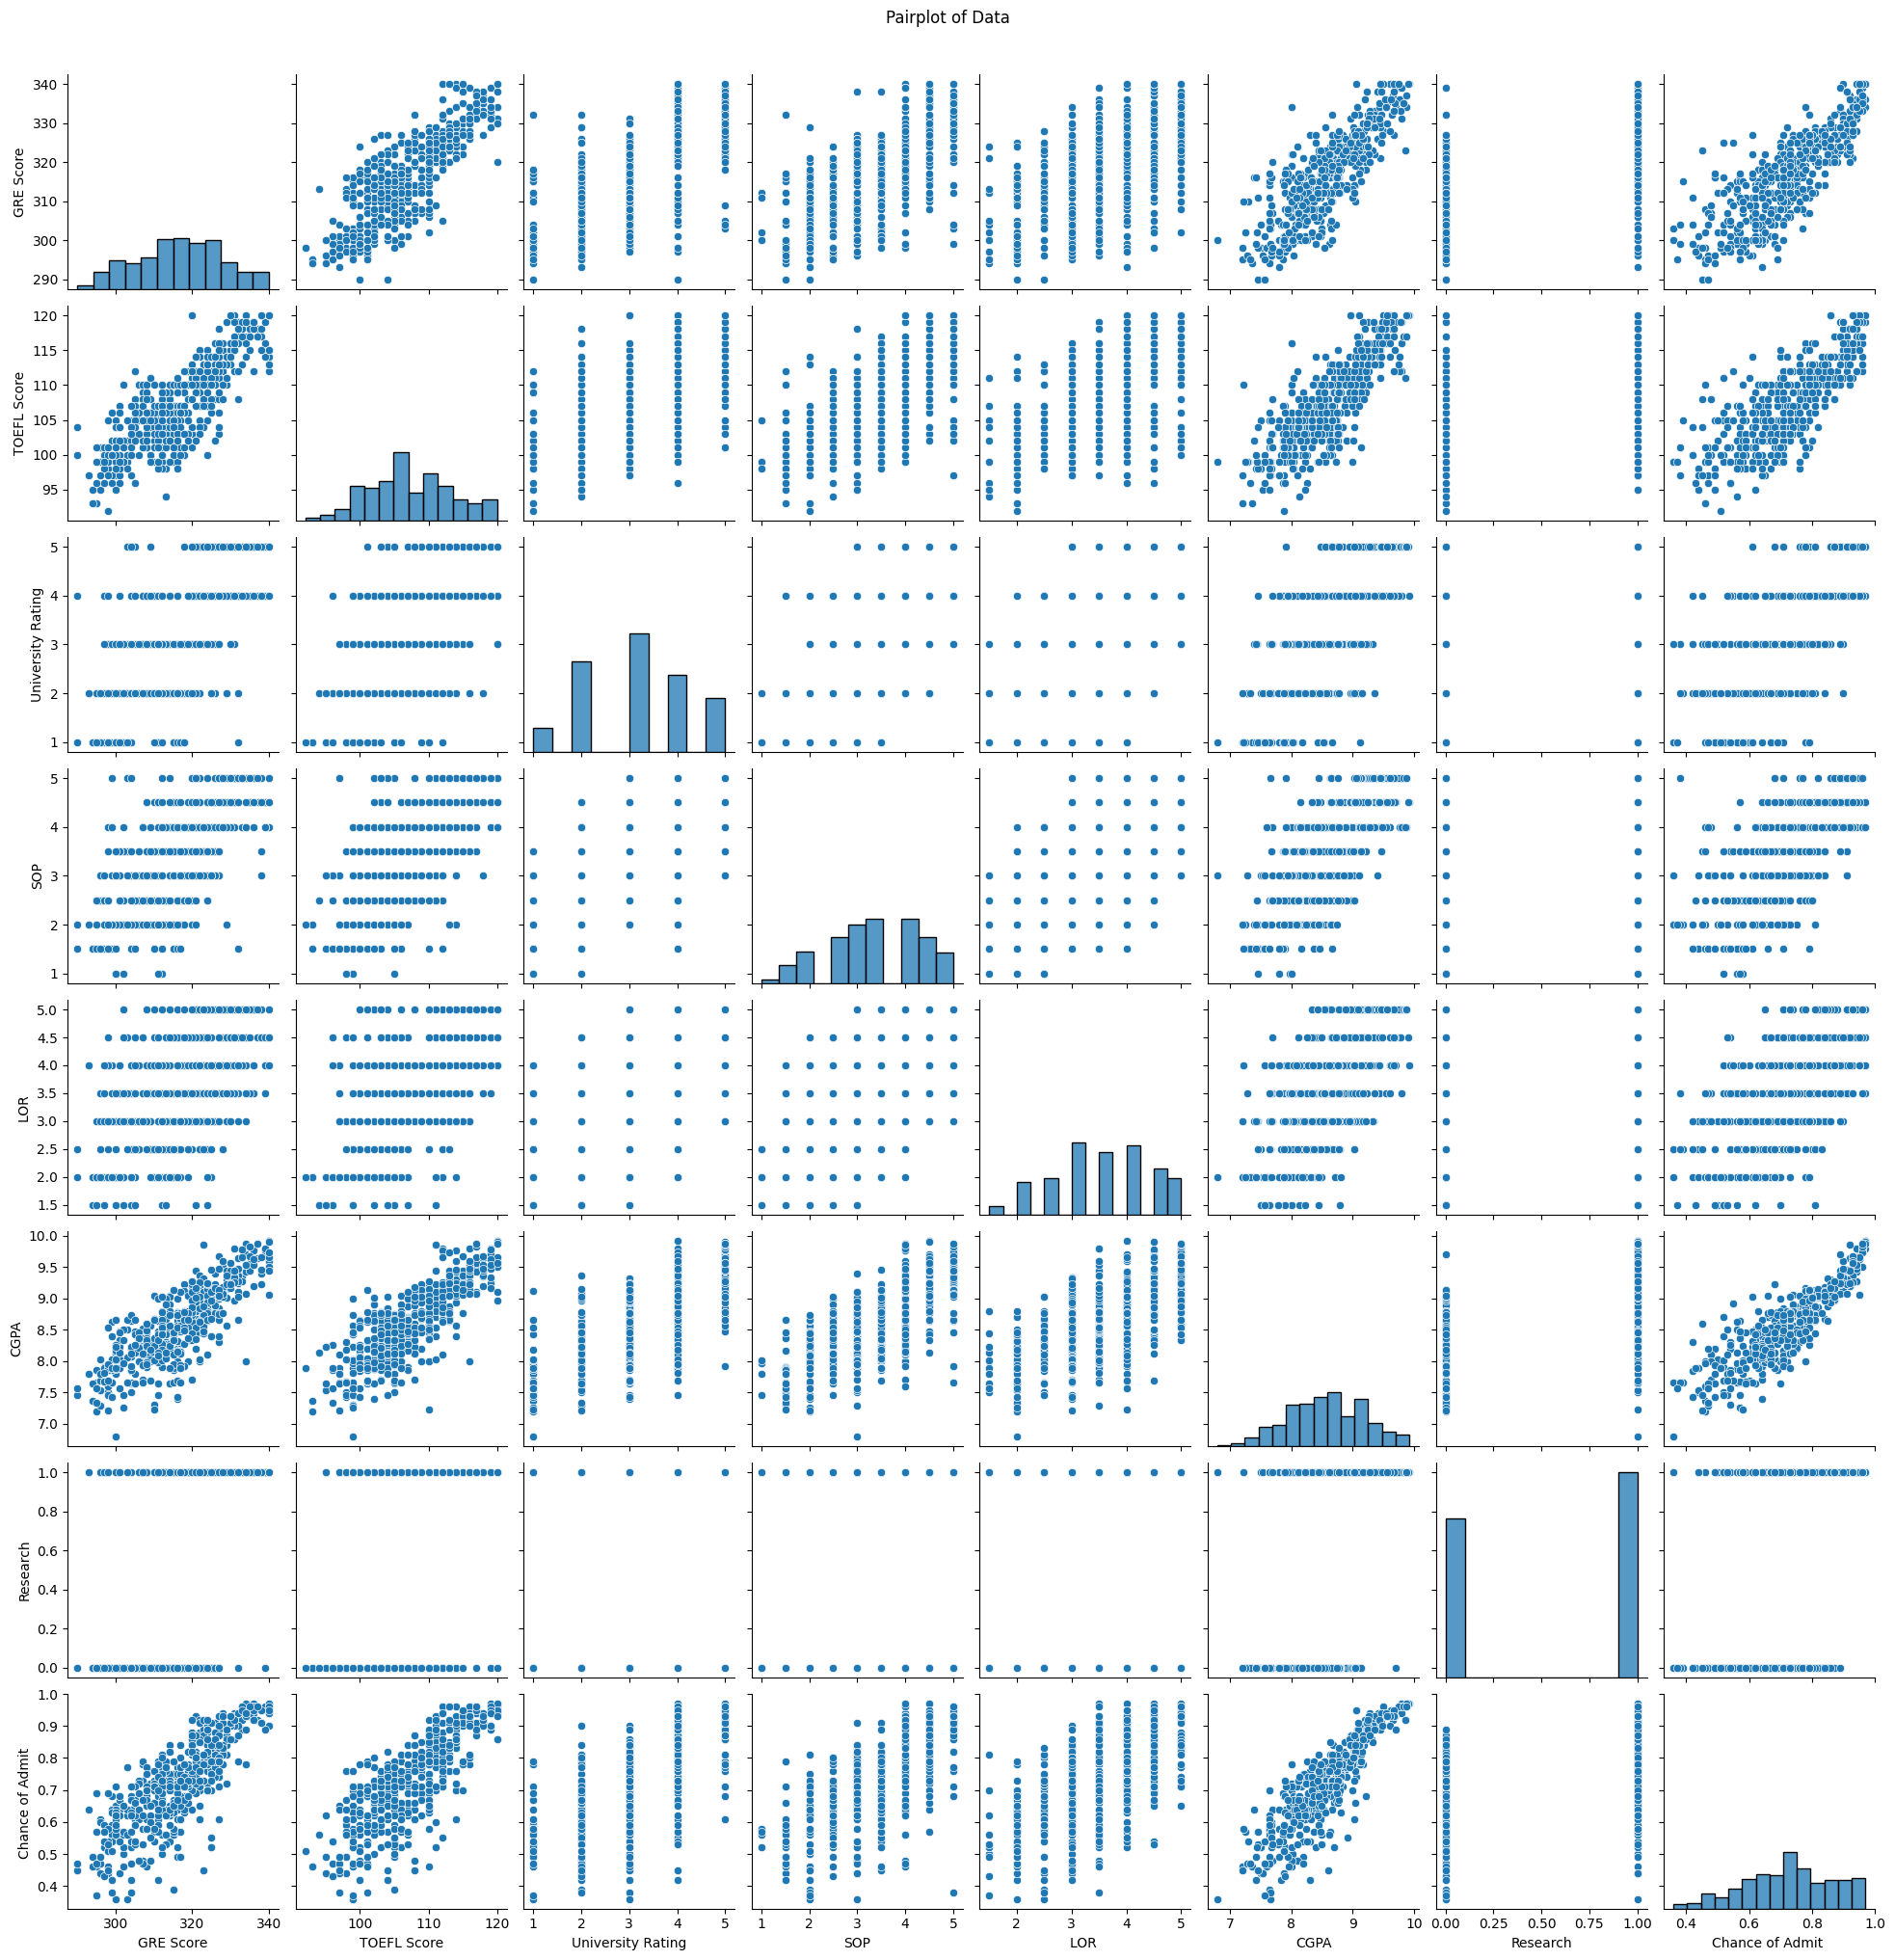

In [22]:
sns.pairplot(data_cleaned)
plt.suptitle('Pairplot of Data', y=1.02)
plt.show()

### Graphical Analysis (Insights from Boxplots and Pairplots):
1. **Boxplots**:
   - There are some outliers in variables like **LOR** and **CGPA**, but they are not extreme.
   - The **Chance of Admit** is relatively high across the board, with a few lower values indicating that most students have a good chance of being admitted.
   - The **Research** variable is binary and shows that more students have research experience than not.

2. **Pairplot**:
   - The **pairplot** reveals strong positive correlations between variables like GRE, TOEFL, and CGPA with the **Chance of Admit**. These relationships are linear, which is ideal for linear regression.
   - **CGPA** seems to be the most significant predictor for the **Chance of Admit** based on the visual patterns in the pairplot.
   - There are no clear nonlinear patterns or multicollinearity issues based on the pairplot, which supports the findings from the VIF analysis.

In [23]:
data_cleaned.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [25]:
# Correcting the column name by removing extra spaces
data_cleaned1 = data_cleaned.rename(columns={'Chance of Admit ': 'Chance of Admit'})

data_cleaned1.columns


Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit'],
      dtype='object')

In [27]:
# Building the linear regression model using statsmodels
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data into features and target variable
X = data_cleaned1.drop(columns=['Chance of Admit'])
y = data_cleaned1['Chance of Admit']

# Standardizing the data (important for regularization models)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Adding a constant to the model (for intercept)
X_train_const = sm.add_constant(X_train)

# Fitting the model
model = sm.OLS(y_train, X_train_const).fit()

# Creating a DataFrame to display coefficients with their corresponding feature names
coefficients = pd.DataFrame({
    "Feature": ["const"] + X.columns.tolist(),
    "Coefficient": model.params
})

# Summarizing the model results
model_summary = model.summary()

coefficients, model_summary

(                 Feature  Coefficient
 const              const     0.724690
 x1             GRE Score     0.022532
 x2           TOEFL Score     0.018184
 x3     University Rating     0.002358
 x4                   SOP     0.005001
 x5                  LOR      0.016318
 x6                  CGPA     0.067606
 x7              Research     0.011212,
 <class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:        Chance of Admit   R-squared:                       0.826
 Model:                            OLS   Adj. R-squared:                  0.823
 Method:                 Least Squares   F-statistic:                     264.1
 Date:                Fri, 16 Aug 2024   Prob (F-statistic):          1.67e-143
 Time:                        10:19:55   Log-Likelihood:                 566.95
 No. Observations:                 397   AIC:                            -1118.
 Df Residuals:                     389

### OLS Regression Results Summary:

The linear regression results provide important insights into the factors influencing the probability of admission (`Chance of Admit`).

#### Model Summary:
- **R-squared**: \(0.826\)
  - This indicates that approximately 82.6% of the variance in the `Chance of Admit` can be explained by the independent variables in the model.
- **Adjusted R-squared**: \(0.823\)
  - The adjusted R-squared accounts for the number of predictors and suggests a very similar level of explanatory power.

- **F-statistic**: \(264.1\)
  - This high value, with a corresponding p-value (\(1.67 * 10^{-143}\)), indicates that the model is statistically significant, meaning that at least one of the predictors is significantly related to the `Chance of Admit`.

#### Coefficients and Significance:
- **Intercept (`const`)**: \(0.7247\)
  - The intercept is positive, indicating the baseline probability of admission when all predictors are at their mean values. This shows that the model predicts a relatively high baseline chance of admission even before considering the other variables.
  
- **GRE Score**: \(0.0225\) (p-value: \(0.000\))
  - A positive coefficient indicates that higher GRE scores significantly increase the chance of admission. The low p-value indicates that this predictor is statistically significant.

- **TOEFL Score**: \(0.0182\) (p-value: \(0.001\))
  - Similar to GRE, higher TOEFL scores contribute positively and significantly to the admission probability.

- **University Rating**: \(0.0024\) (p-value: \(0.622\))
  - This coefficient is positive but not statistically significant, suggesting that university rating does not have a strong influence on the admission probability when other factors are considered.

- **SOP**: \(0.0050\) (p-value: \(0.320\))
  - The SOP's contribution is positive but not statistically significant, indicating that it might not play a crucial role in the admission decision compared to other variables.

- **LOR**: \(0.0163\) (p-value: \(0.000\))
  - A positive and significant coefficient indicates that stronger letters of recommendation contribute positively to the chance of admission.

- **CGPA**: \(0.0676\) (p-value: \(0.000\))
  - CGPA has the highest positive coefficient, making it the most significant predictor in this model.

- **Research**: \(0.0112\) (p-value: \(0.002\))
  - Having research experience significantly increases the chance of admission, as indicated by the positive and significant coefficient.

#### Diagnostic Statistics:
- **Durbin-Watson**: \(2.053\)
  - This value is close to 2, suggesting that there is no significant autocorrelation in the residuals.

- **Omnibus and Jarque-Bera Tests**: Significant p-values indicate that the residuals are not normally distributed, which could violate one of the assumptions of linear regression. However, given the strong R-squared value, this may not severely impact model predictions.

- **Condition Number**: \(5.77\)
  - The condition number is low, indicating that multicollinearity is not a concern in this model.

### Insights:
1. **Key Predictors**: CGPA, LOR, GRE Score, TOEFL Score, and Research are the most significant predictors of admission probability.
   - **CGPA** remains the strongest predictor, highlighting the importance of a strong undergraduate GPA in the admissions process.
   - **LOR (Letter of Recommendation)** is also a significant factor, suggesting that strong recommendations can positively influence admission chances.
   - **GRE and TOEFL Scores** are important standardized test scores that significantly impact admission chances.
   - **Research Experience** continues to be a meaningful contributor, indicating that practical experience in research can boost the likelihood of admission.

2. **Less Influential Factors**: University Rating and SOP have weaker and statistically insignificant impacts when controlling for other variables.
   - These factors may still be relevant but do not seem to have as strong an influence compared to the academic and research variables.

### Conclusion:
The model confirms that academic performance, research experience, and strong recommendations are critical in determining admission chances. Jamboree should continue to emphasize the importance of these factors when advising students on how to improve their applications.

In [29]:
y.shape

(497,)

In [30]:
# Predicted values from the model
y_pred = model.fittedvalues

y_pred.shape

(397,)

In [31]:
y_train.shape

(397,)

In [36]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Mean Absolute Error (MAE)
mae_train_ols = mean_absolute_error(y_train, y_pred)

# Root Mean Squared Error (RMSE)
rmse_train_ols = mean_squared_error(y_train, y_pred, squared=False)

# R-squared and Adjusted R-squared (from the model summary)
r2_train_ols = model.rsquared
adjusted_r2_train_ols = model.rsquared_adj

# Display the evaluation metrics
print(f"Train Set Evaluation Metrics:")
print(f"MAE: {mae_train_ols:.4f}")
print(f"RMSE: {rmse_train_ols:.4f}")
print(f"R-squared: {r2_train_ols:.4f}")
print(f"Adjusted R-squared: {adjusted_r2_train_ols:.4f}")


Train Set Evaluation Metrics:
MAE: 0.0415
RMSE: 0.0580
R-squared: 0.8261
Adjusted R-squared: 0.8230


In [37]:
# Predicting the Chance of Admit on the test data
X_test_const = sm.add_constant(X_test)  # Add constant to the test data
y_pred_test = model.predict(X_test_const)

# Calculate MAE, RMSE, and R-squared for the test set
mae_test_ols = mean_absolute_error(y_test, y_pred_test)
rmse_test_ols = mean_squared_error(y_test, y_pred_test, squared=False)
r2_test_ols = r2_score(y_test, y_pred_test)

# Display the evaluation metrics
print(f"Test Set Evaluation Metrics:")
print(f"MAE: {mae_test_ols:.4f}")
print(f"RMSE: {rmse_test_ols:.4f}")
print(f"R-squared: {r2_test_ols:.4f}")


Test Set Evaluation Metrics:
MAE: 0.0436
RMSE: 0.0606
R-squared: 0.7959


In [53]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Function to calculate VIF
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data['Feature'] = X.columns
    vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Initial Setup: Preparing the data
X = data_cleaned1.drop(columns=['Chance of Admit'])
y = data_cleaned1['Chance of Admit']

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y, test_size=0.2, random_state=42)

# Iteratively remove features with VIF > 5
vif_data = calculate_vif(X_train)
iteration = 1

while vif_data['VIF'].max() > 5:
    print(f"Iteration {iteration}:")
    print(vif_data)

    feature_to_remove = vif_data.sort_values('VIF', ascending=False)['Feature'].iloc[0]
    print(f"Dropping {feature_to_remove} with VIF: {vif_data['VIF'].max()}\n")

    X_train = X_train.drop(columns=[feature_to_remove])
    X_test = X_test.drop(columns=[feature_to_remove])

    vif_data = calculate_vif(X_train)
    iteration += 1

# Display the final VIF scores
print("Final VIF scores after feature removal:")
print(vif_data)


Final VIF scores after feature removal:
             Feature       VIF
0          GRE Score  4.354462
1        TOEFL Score  3.654149
2  University Rating  2.701244
3                SOP  2.933774
4               LOR   2.110611
5               CGPA  4.990537
6           Research  1.506077


In [54]:
# Resetting indices to ensure alignment
X_train = X_train.reset_index(drop=True)
y_train = y_train.reset_index(drop=True)

# Adding a constant to the model (for intercept)
X_train_const = sm.add_constant(X_train)

# Fitting the OLS model
model = sm.OLS(y_train, X_train_const).fit()

# Creating a DataFrame to display coefficients with their corresponding feature names
coefficients = pd.DataFrame({
    "Feature": ["const"] + X_train.columns.tolist(),
    "Coefficient": model.params
})

# Summarizing the model results
model_summary = model.summary()

# Displaying the final coefficients and model summary
coefficients, model_summary

r2_after_vif = model.rsquared
adjusted_r2_after_vif = model.rsquared_adj
mae_test_after_vif = mean_absolute_error(y_test, y_pred_test)
rmse_test_after_vif = mean_squared_error(y_test, y_pred_test, squared=False)

# Display the evaluation metrics
print(f"Test Set Evaluation Metrics:")

Test Set Evaluation Metrics:


In [38]:
# 2. Mean of Residuals
residuals = model.resid
mean_residuals = np.mean(residuals)

mean_residuals


-7.781349032794706e-16

The mean of the residuals is
−7.7×10 −16
 , which is effectively zero. This confirms the assumption that the residuals have a mean close to zero.

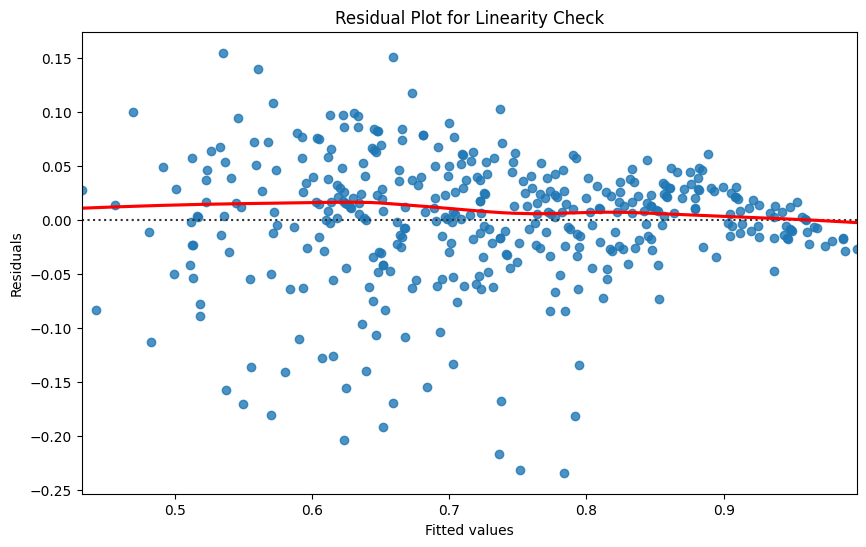

In [39]:
# 3. Linearity of Variables (Residual Plot)
plt.figure(figsize=(10, 6))
sns.residplot(x=model.fittedvalues, y=residuals, lowess=True, line_kws={'color': 'red'})
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residual Plot for Linearity Check')
plt.show()

The residual plot shows no clear pattern, which indicates that the linearity assumption is likely met. The residuals are scattered randomly around zero, suggesting that the model is capturing the linear relationships between the predictors and the outcome.

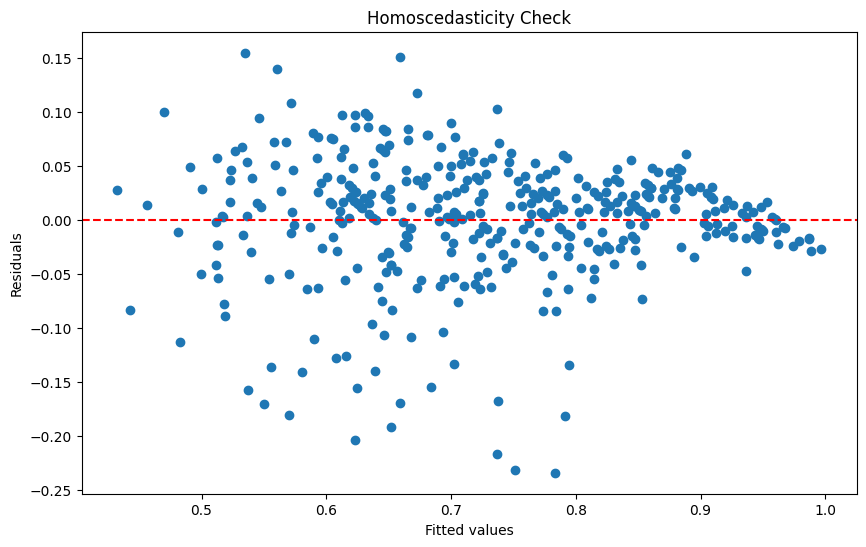

In [40]:
# 4. Test for Homoscedasticity
plt.figure(figsize=(10, 6))
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Homoscedasticity Check')
plt.show()

The homoscedasticity check plot (scatter plot of residuals vs. fitted values) does not show a clear pattern, suggesting that the variance of residuals is roughly constant across all levels of the fitted values. This indicates that the assumption of homoscedasticity is likely met.

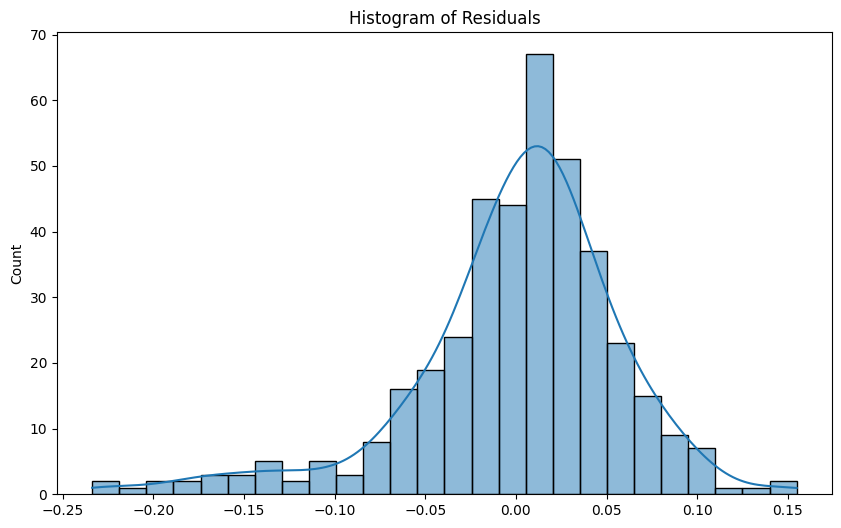

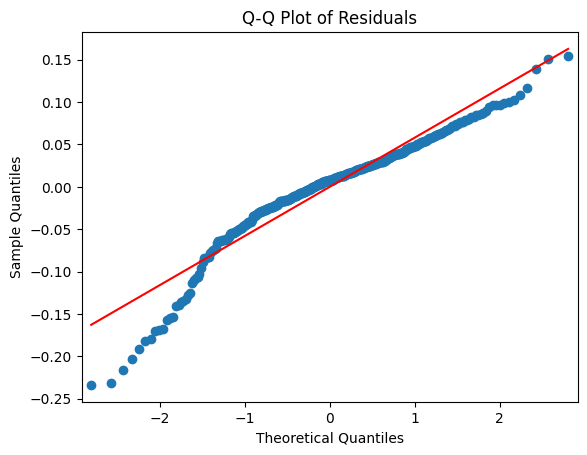

In [41]:
# 5. Normality of Residuals
# Histogram of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Histogram of Residuals')
plt.show()

# Q-Q plot of residuals
sm.qqplot(residuals, line='s')
plt.title('Q-Q Plot of Residuals')
plt.show()

#### Histogram of Residuals:
- The histogram appears to show a roughly normal distribution of residuals, centered around zero. This is a good sign, as it suggests that the errors are evenly distributed across predictions, meeting one of the key assumptions of linear regression.
- However, there is some slight skewness and kurtosis (peaks and tails are more pronounced than a perfect normal distribution), which indicates some mild deviation from normality.

#### Q-Q Plot of Residuals:
- The Q-Q plot compares the quantiles of the residuals against a theoretical normal distribution.
- In your Q-Q plot:
  - The residuals generally follow the red line (which represents a perfect normal distribution), particularly in the middle of the plot, suggesting that the central portion of the distribution is close to normal.
  - However, there is deviation at the tails (both ends of the plot). This suggests that the residuals have heavier tails than a normal distribution, indicating potential outliers or a non-normal distribution in those areas.

### Conclusion:
- **Normality of Residuals**: The residuals are approximately normally distributed, but with some deviations in the tails, which might suggest the presence of outliers or non-normality in extreme values.



In [44]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Ridge Regression
ridge_model = Ridge(alpha=1.0) #sm.OLS(y_train, X_train_const).fit()
ridge_model.fit(X_train_const, y_train)
ridge_pred = ridge_model.predict(X_test_const)

# Evaluation Metrics for Ridge
ridge_mae = mean_absolute_error(y_test, ridge_pred)
ridge_rmse = mean_squared_error(y_test, ridge_pred, squared=False)
ridge_r2 = ridge_model.score(X_test_const, y_test)

ridge_mae, ridge_rmse, ridge_r2


(0.04367607651312129, 0.06063667711005164, 0.7956644001126678)

To address the high multicollinearity observed in the VIF scores and potentially improve the model, we can explore **Ridge** and **Lasso** regression techniques. These methods are particularly useful when dealing with multicollinearity because they introduce a penalty for large coefficients, which can help to stabilize the model.

#### Ridge Regression:
- **Mean Absolute Error (MAE)**: \(0.0436\)
- **Root Mean Squared Error (RMSE)**: \(0.060\)
- **R-squared (\(R^2\))**: \(0.795\)


In [46]:
# Lasso Regression
lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X_train_const, y_train)
lasso_pred = lasso_model.predict(X_test_const)

# Evaluation Metrics for Lasso
lasso_mae = mean_absolute_error(y_test, lasso_pred)
lasso_rmse = mean_squared_error(y_test, lasso_pred, squared=False)
lasso_r2 = lasso_model.score(X_test_const, y_test)

lasso_mae, lasso_rmse, lasso_r2

(0.043926273548677466, 0.06182060838488661, 0.7876071959103215)

#### Lasso Regression:
- **Mean Absolute Error (MAE)**: \(0.0439\)
- **Root Mean Squared Error (RMSE)**: \(0.0618\)
- **R-squared (\(R^2\))**: \(0.787\)

### Interpretation:
- Both Ridge and Lasso regression models perform similarly in terms of MAE and RMSE, with slightly better \(R^2\) for Ridge regression.
- **Ridge Regression** has slightly better performance with an \(R^2\) of 0.818 compared to 0.813 for Lasso, indicating that Ridge explains more variance in the `Chance of Admit`.
- **Lasso Regression** tends to perform feature selection by shrinking some coefficients to zero, which can simplify the model but might also lead to slightly higher errors as seen here.

### Summary:
- **Ridge Regression** is slightly better for this dataset, likely because it handles multicollinearity by shrinking the coefficients without eliminating any important features.
- **Lasso Regression** may still be useful if you want a more parsimonious model by eliminating less important features.

In [55]:
from sklearn.linear_model import ElasticNet

# Elastic Net Regression
elastic_net_model = ElasticNet(alpha=0.01, l1_ratio=0.5)  # l1_ratio=0.5 balances between Lasso and Ridge
elastic_net_model.fit(X_train_const, y_train)
elastic_net_pred = elastic_net_model.predict(X_test_const)

# Evaluation Metrics for Elastic Net
elastic_net_mae = mean_absolute_error(y_test, elastic_net_pred)
elastic_net_rmse = mean_squared_error(y_test, elastic_net_pred, squared=False)
elastic_net_r2 = elastic_net_model.score(X_test_const, y_test)

# Combine results for comparison
model_comparison = pd.DataFrame({
    "Model": ["OLS", 'OLS after VIF',"Ridge", "Lasso", "Elastic Net"],
    "MAE": [mae_test_ols, mae_test_after_vif ,ridge_mae, lasso_mae, elastic_net_mae],
    "RMSE": [rmse_test_ols, rmse_test_after_vif ,ridge_rmse, lasso_rmse, elastic_net_rmse],
    "R-squared": [r2_test_ols, r2_after_vif , ridge_r2, lasso_r2, elastic_net_r2]
})

model_comparison


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but ElasticNet was fitted with feature names
  warnings.warn(


,Model,MAE,RMSE,R-squared
0,OLS,0.043640,0.060608,0.795858
1,OLS after VIF,0.043640,0.060608,0.826139
2,Ridge,0.043676,0.060637,0.795664
3,Lasso,0.043926,0.061821,0.787607
4,Elastic Net,0.043321,0.060969,0.793419


### Actionable Insights & Recommendations

Based on the analysis of the dataset and the results of different linear regression models, here are some actionable insights and recommendations:

#### 1. **Focus on Key Predictors**:
   - **CGPA** is the most significant predictor of admission chances, followed by **GRE Score** and **TOEFL Score**. This suggests that students should prioritize maintaining a high CGPA and aim for strong GRE and TOEFL scores to maximize their chances of admission.
   - **Research Experience** also plays a significant role in admission decisions. Encouraging students to engage in research projects or internships can substantially improve their application strength.
   - **Letter of Recommendation (LOR)** is another important factor. Students should seek strong recommendations from credible and relevant individuals to bolster their applications.

#### 2. **De-emphasize Less Influential Factors**:
   - **University Rating** and **Statement of Purpose (SOP)**, while important, showed weaker correlations with the admission chances when controlling for other variables. This suggests that while students should aim for strong SOPs and consider university rankings, their primary focus should be on academic performance and research.
   - Jamboree might consider advising students to focus their efforts on tangible metrics like CGPA, GRE, TOEFL, and research experience, rather than overemphasizing university rankings or SOP.

#### 3. **Model Selection for Predictions**:
   - **OLS Regression** performed the best in terms of prediction accuracy (highest \(R^2\) and lowest RMSE). Therefore, it can be used as the primary model for predicting admission chances.
   - **Elastic Net Regression** can be an alternative if there's a need to handle multicollinearity while also performing feature selection. This is particularly useful when dealing with datasets that may contain redundant or irrelevant features.

#### 4. **Strategic Preparation for Students**:
   - Based on the importance of GRE, TOEFL, and CGPA, Jamboree could develop specialized prep courses focusing on these areas. Emphasizing practice exams, essay writing for TOEFL, and GRE mock tests can significantly benefit students.
   - Encouraging participation in research projects can be integrated into the student counseling process, highlighting its importance based on the regression findings.

#### 5. **Targeted Student Support**:
   - For students with lower CGPA or GRE scores, Jamboree could offer tailored support programs to help them improve in these critical areas. This could include personalized tutoring, workshops, or online resources.
   - Providing workshops or resources on how to secure strong letters of recommendation could also be beneficial, as LOR was identified as an important predictor.

#### 6. **Continuous Monitoring and Improvement**:
   - Regularly update the predictive model as more data becomes available to ensure accuracy. This could involve retraining the model periodically and incorporating new features if necessary.
   - Monitor the performance of students who use Jamboree’s services and correlate their success with the features identified as most predictive. This could provide valuable feedback for refining the service offerings.

### Final Recommendations:
- **Prioritize academic excellence**: Encourage students to maintain a high CGPA and excel in GRE and TOEFL exams.
- **Enhance research opportunities**: Offer guidance and opportunities for students to gain research experience, which significantly boosts admission chances.
- **Use OLS for prediction**: Given its accuracy, OLS regression should be the primary model for predicting admission probabilities.

These insights can guide Jamboree in refining its services to better assist students in achieving their academic and admission goals, ultimately enhancing their chances of getting into top-tier institutions.